<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/65_Day_Random_Forest_Bias_and_varience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [168]:
X,y = make_circles(n_samples=1000,factor=0.3, noise=0.3, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [169]:
X[:3]

array([[ 0.10902389,  0.30632778],
       [ 0.03589295,  0.28028259],
       [-0.51463614,  0.76775439]])

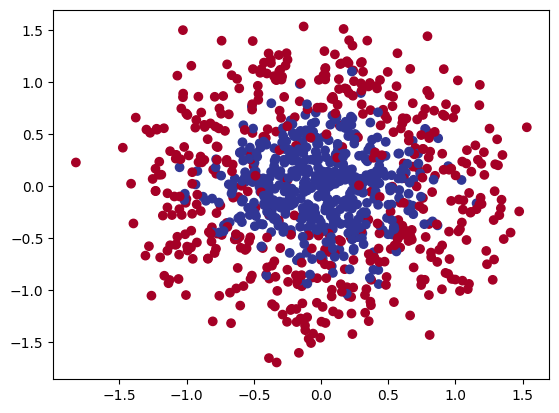

In [170]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [171]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

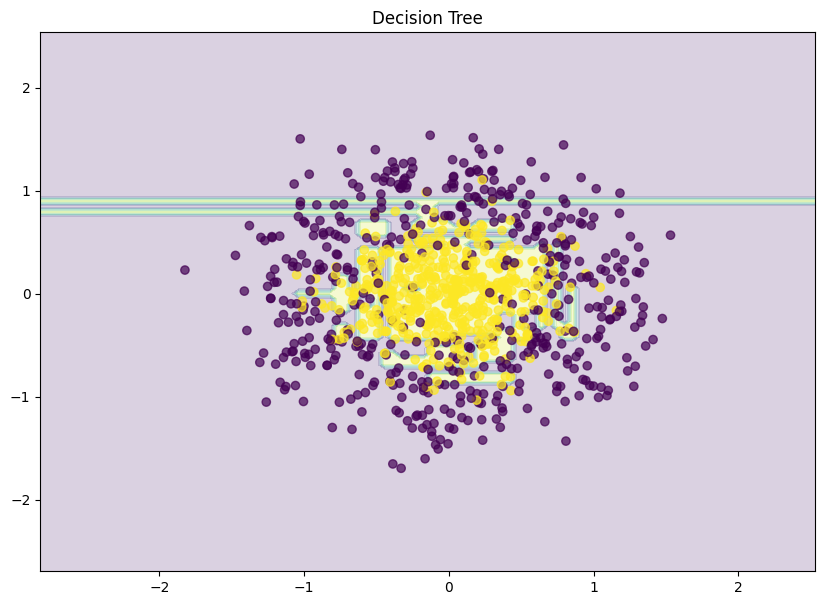

In [172]:
plt.figure(figsize=(10,7))

x_range= np.linspace(X[:,0].min()-1,X[:,0].max()+1,100)
y_range= np.linspace(X[:,1].min()-1,X[:,1].max()+1,100)

xx1,xx2 = np.meshgrid(x_range,y_range)

y_hat=clf.predict(np.c_[xx1.ravel(),xx2.ravel()])

y_hat=y_hat.reshape(xx1.shape)

plt.contourf(xx1,xx2,y_hat , alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title("Decision Tree")
plt.show()

In [173]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

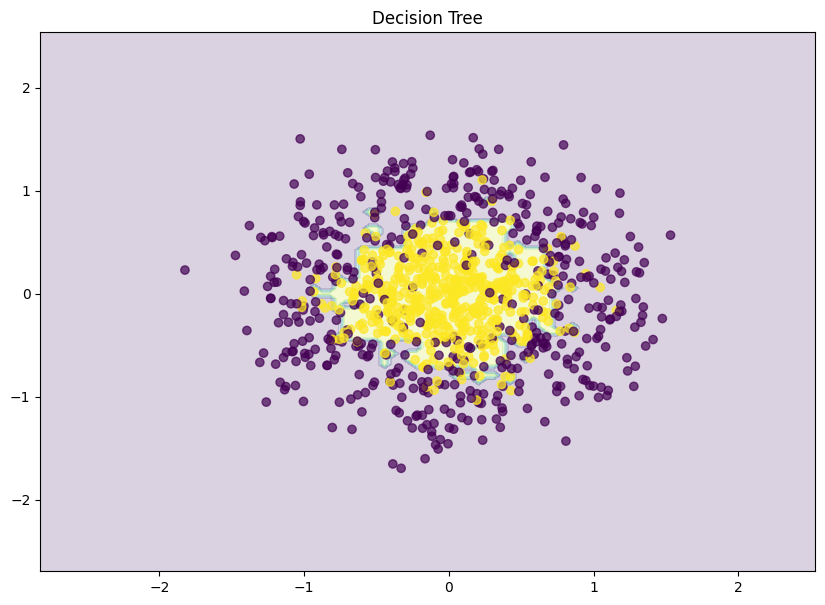

In [174]:
plt.figure(figsize=(10,7))

x_range= np.linspace(X[:,0].min()-1,X[:,0].max()+1,100)
y_range= np.linspace(X[:,1].min()-1,X[:,1].max()+1,100)

xx1,xx2 = np.meshgrid(x_range,y_range)

y_hat=clf.predict(np.c_[xx1.ravel(),xx2.ravel()])

y_hat=y_hat.reshape(xx1.shape)

plt.contourf(xx1,xx2,y_hat , alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title("Decision Tree")
plt.show()

# Random forest for Regression

In [175]:
n_train= 150
n_test =1000
noise =0.1

# generate data

def f(x):
  x=x.ravel()

  return np.exp(-x**2)+ 1.5*np.exp(-(x-2)**2)

def generate(n_samples,noise):
  X=np.random.rand(n_samples)*10-5
  X=np.sort(X).ravel()
  y=np.exp(-X**2)+ 1.5*np.exp(-(X-2)**2)\
    +np.random.normal(0.0,scale=noise,size=n_samples)

  X=X.reshape((n_samples,1))

  return X,y


X_train,y_train = generate(n_samples=n_train,noise=noise)
X_test,y_test = generate(n_samples=n_test,noise=noise)

(-5.0, 5.0)

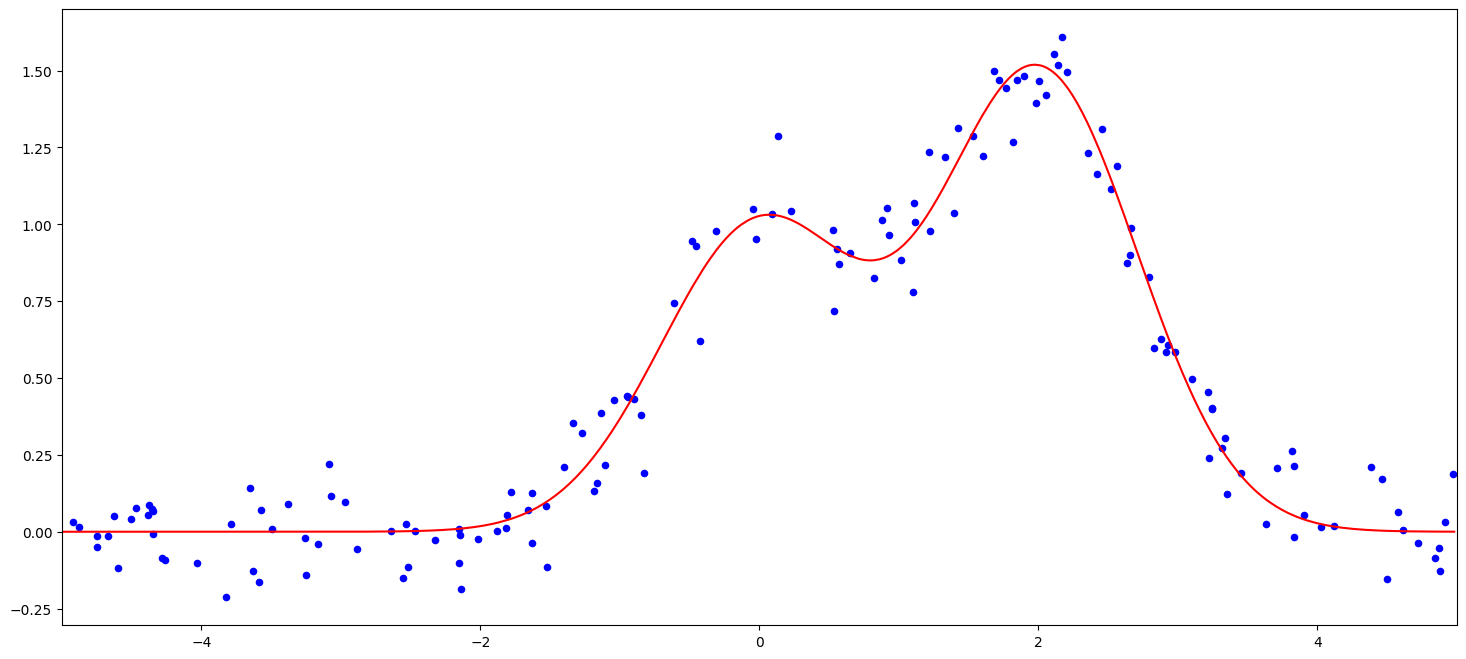

In [176]:
plt.figure(figsize=(18,8))
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,f(X_test),c='r',label='test')
plt.xlim([-5,5])

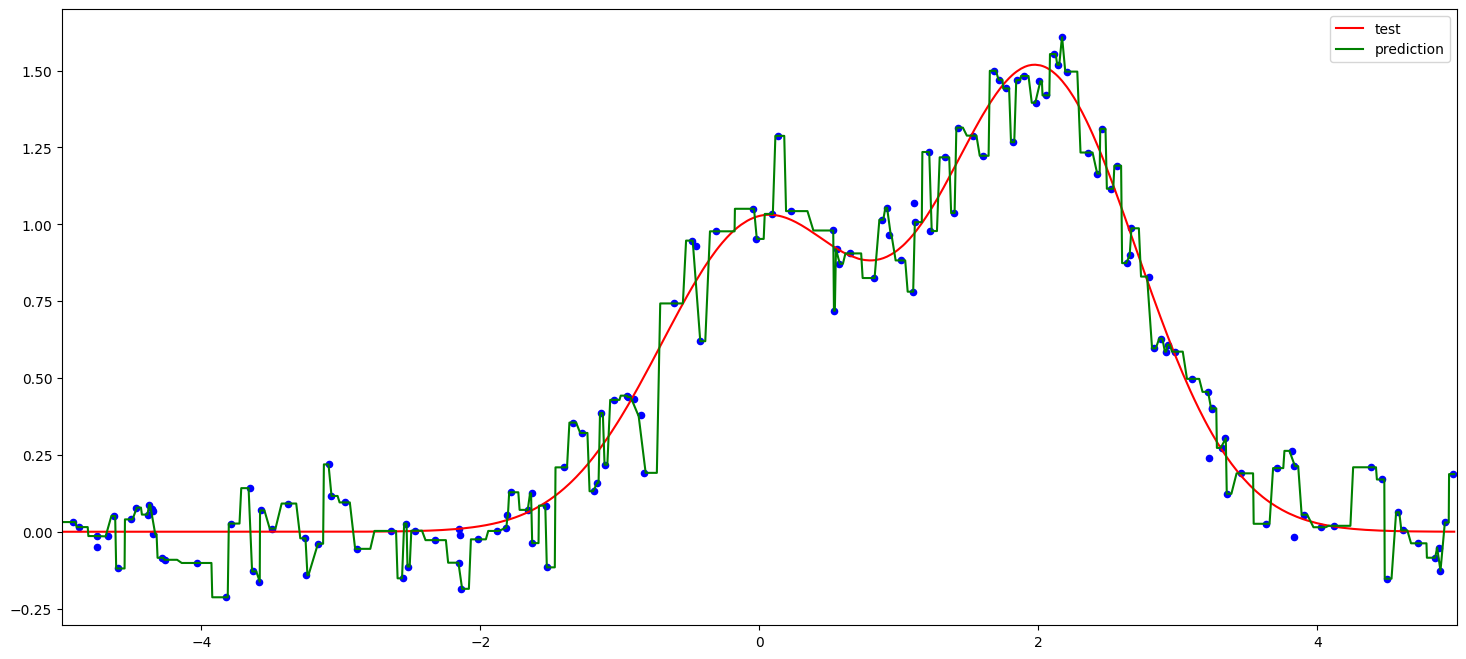

In [177]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)

pre=reg.predict(X_test)

plt.figure(figsize=(18,8))
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,f(X_test),c='r',label='test')
plt.xlim([-5,5])
plt.plot(X_test,pre,c='g',label='prediction')
plt.legend()


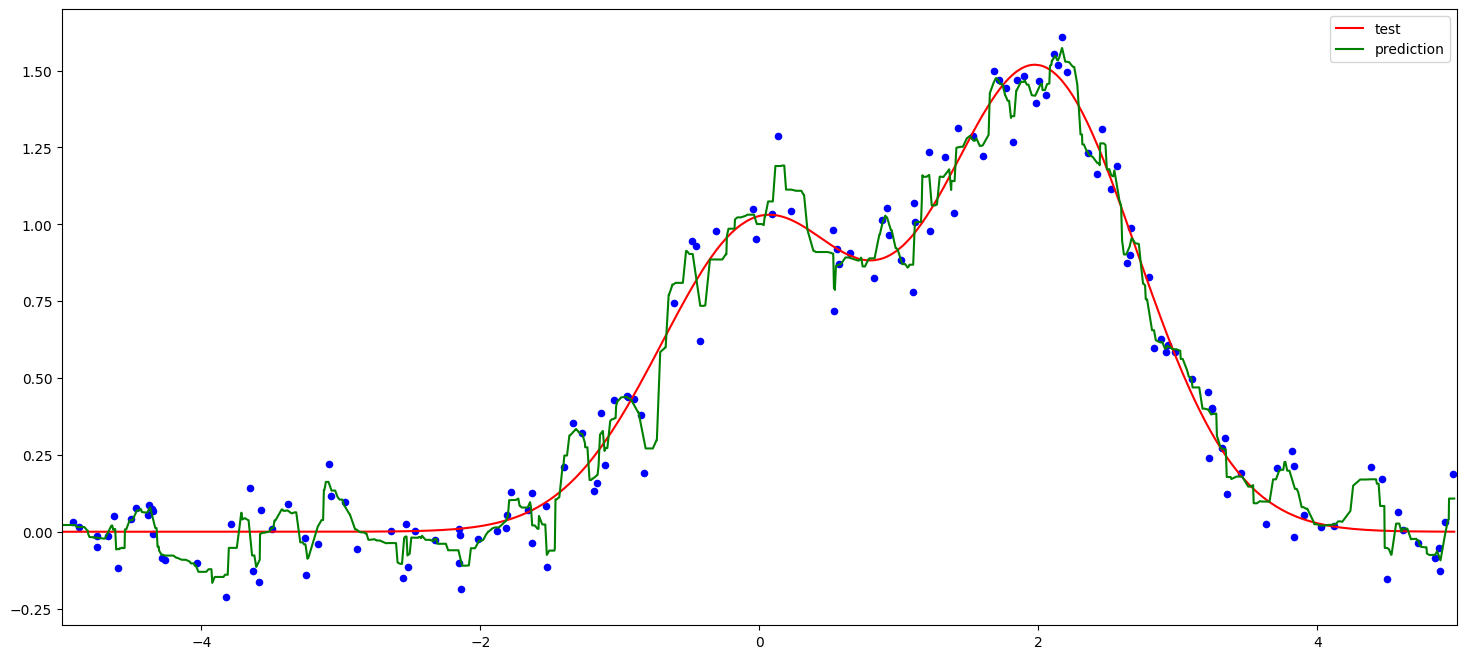

In [181]:
# random forest

from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

pre=reg.predict(X_test)

plt.figure(figsize=(18,8))
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,f(X_test),c='r',label='test')
plt.xlim([-5,5])
plt.plot(X_test,pre,c='g',label='prediction')
plt.legend()
